In [4]:
# !pip install shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


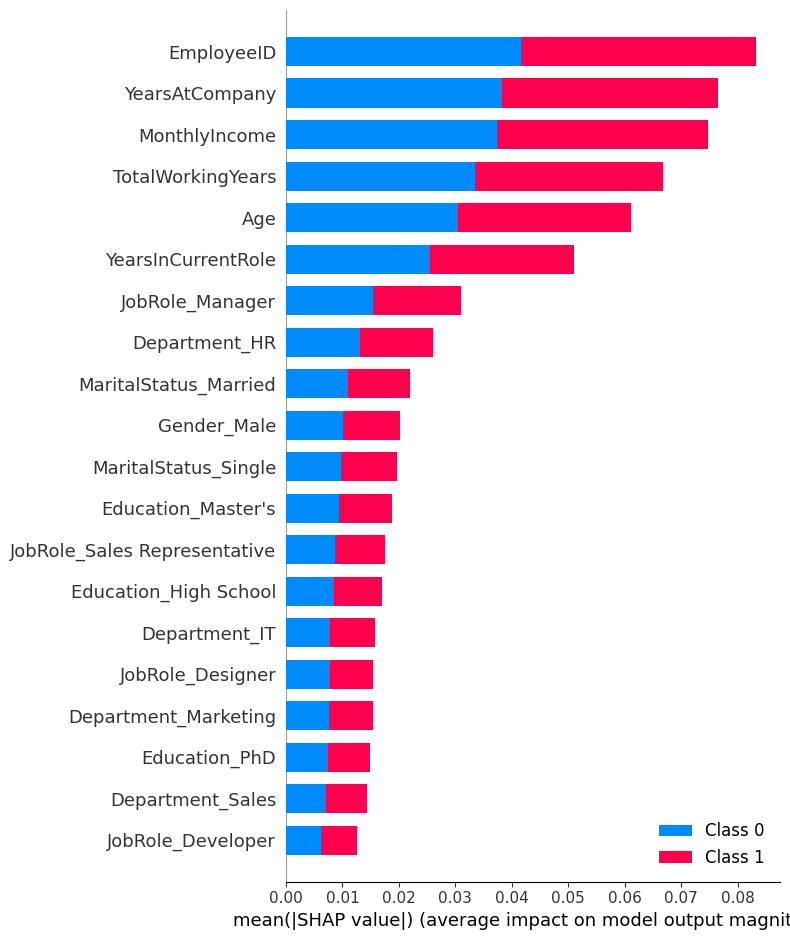

In [1]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

# Load the dataset
data = pd.read_csv('data/employee_turnover_dataset.csv')  # Updated file name

# Separate the target variable 'Attrition' from the features
y = data['Attrition']
X = data.drop('Attrition', axis=1)

# Perform one-hot encoding for all categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Build a random forest classifier for interpretability
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Explain model predictions using SHAP values
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X)

# Example: Plot summary SHAP values
shap.summary_plot(shap_values, X, feature_names=X.columns)
